In [1]:
import pickle
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from model import side_to_binary, stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train = pd.read_excel("data//train.xlsx")
X_train = np.array(train["texts"])
sides = np.array([side_to_binary(side) for side in train["sides"]])
vector = CountVectorizer(max_features=2000, stop_words=stopwords).fit(X_train)
X_train_vector = vector.transform(X_train)
mat = X_train_vector.todense()

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['באיזו', 'בו', 'במקום', 'בשעה', 'הסיבה', 'לאיזו', 'למקום', 'מאיזו', 'מידה', 'מקום', 'סיבה', 'שבגללה', 'שבו', 'תכלית'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [3]:
mat.shape

(74, 2000)

In [4]:
pca = PCA(n_components=3)
pca_res = pca.fit_transform(mat)

In [5]:
right_idxs = [i for i in range(len(sides)) if sides[i] == 1]
left_idxs = [i for i in range(len(sides)) if sides[i] == 0]

In [6]:
right_points = np.array([pca_res[i] for i in right_idxs])
left_points = np.array([pca_res[i] for i in left_idxs])

In [7]:
right_points.shape

(37, 3)

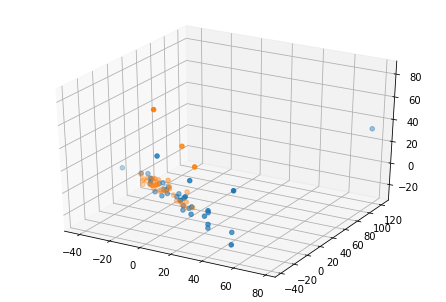

In [8]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(right_points[:,0], right_points[:,1], right_points[:,2])
ax.scatter(left_points[:,0], left_points[:,1], left_points[:,2])

plt.show()

In [9]:
vector.vocabulary_

{'במקום': 413,
 'שר': 1954,
 'המשפטים': 763,
 'בועדת': 346,
 'חוקה': 988,
 'zehavagalon': 180,
 'זהבה': 947,
 'די': 539,
 'מבינה': 1383,
 'לך': 1273,
 'אדם': 200,
 'סיפור': 1631,
 'חבר': 962,
 'לעשות': 1318,
 'לקח': 1337,
 '100': 1,
 'אלף': 259,
 'שקל': 1949,
 'הארץ': 580,
 'נכנס': 1592,
 'ממש': 1474,
 'להשאיר': 1236,
 'ענף': 1679,
 'עובדים': 1651,
 'הממשלה': 748,
 'לסגור': 1303,
 'שיש': 1898,
 'חכ': 1012,
 'ayeletshaked': 43,
 'התנהלות': 886,
 'באולפן': 304,
 'הייתי': 693,
 'שרת': 1962,
 'ההפגנות': 631,
 'תפילה': 1989,
 'באוויר': 303,
 'הפתוח': 821,
 'איש': 240,
 'מהבית': 1402,
 'הפגנות': 808,
 'במקביל': 412,
 'הפרטי': 818,
 'להמשיך': 1219,
 'לעבוד': 1307,
 'knessett': 99,
 'שעה': 1944,
 'וחצי': 918,
 'אביב': 189,
 'לירושלים': 1271,
 'בתגובה': 498,
 'אמר': 272,
 'יו': 1061,
 'ממשלת': 1478,
 'ישראל': 1108,
 'בכל': 387,
 'העולם': 793,
 'כבר': 1115,
 'זמן': 959,
 'עסקים': 1681,
 'עמדתי': 1673,
 'המגזר': 731,
 'עובד': 1648,
 'לאחר': 1171,
 'החלטת': 664,
 'שקד': 1948,
 'כעת': 1153,
 'עדכון

In [10]:
len(vector.get_feature_names())

2000